<div class="frontmatter text-center">
<h1>Geospatial Data Science</h1>
<h2>Exercise 2: Geospatial Data in Python</h2>
<h3>IT University of Copenhagen, Spring 2024</h3>
<h3>Instructor: Ditte Stavski</h3>
</div>

This notebook was adapted from:
* Automating GIS-Processes: https://autogis-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html

## Problem 1: Create Polygon from lists of coordinates

In the first problem **the aim is to create a polygon based on the provided coordinates, and to plot the polygon on as a map.** 

Two lists: `longitudes` and `latitudes` contain the input coordinates for the polygon. The first coordinate pair looks like this: `(29.99671173095703, 63.748023986816406)`.
 
The codeblocks below help you get started with the task. More detailed instructions are given below.

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd
# Longitudes in decimal degrees
longitudes = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Latitudes in decimal degrees
latitudes = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


**1. Create a Polygon variable `poly` based on the coordinates:**
- Create a list of coordinate pairs based on the provided longitudes and latitudes and store the list in a variable `coordpairs`. A coordinate pair can be either a tuple or a list.
- Create a shapely Polygon using the `coordpairs` -list. Store the polygon in a variable `poly`.

Please use the provided variable names.

In [2]:
# Create a list of coordinate pairs
coordpairs = list(zip(longitudes, latitudes))

# Create a shapely Polygon using the 'coordpairs' -list
poly = Polygon(coordpairs)


In [3]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check the first coordinate pair. Shoud be: (29.99671173095703, 63.748023986816406)
print(coordpairs[0])

(29.99671173095703, 63.748023986816406)


In [4]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check the data type of your polygon:
print(poly.geom_type)

Polygon


**2. Insert the polygon into a GeoDataFrame called `geo`:**
- Create an empty geodataframe variable `geo`
- Insert our `poly` -polygon into the `geo` GeoDataFrame into a new column named 'geometry'

Please use the provided variable names (replace `None` with your own code).

In [5]:
# Create an empty GeoDataFrame
geo = gpd.GeoDataFrame(geometry=[poly])



In [6]:
geo

geometry
0  POLYGON ((29.99671 63.74802, 31.58196 62.90790...

In [7]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check the number of rows:
assert len(geo) == 1

assert geo.geom_type.unique()[0] == 'Polygon'

# Check the content of the GeoDataFrame:
geo.head()

geometry
0  POLYGON ((29.99671 63.74802, 31.58196 62.90790...

**3. Plot the polygon.**

Note: you might need to call matplotlib pyplot `show()`-method in order to display the map

<AxesSubplot:>

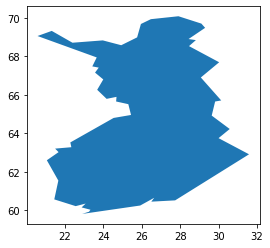

In [8]:
geo.plot()

**4. Save the GeoDataFrame into a Geopackage called `'polygon.gpkg'`.**

In [9]:
# Save the GeoDataFrame into a new Shapefile called 'polygon.shp'.
fp = 'data/polygon.gpkg'

geo.to_file(fp)

/opt/conda/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [10]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

#Check if output file exists
assert os.path.isfile(fp), "Output file does not exist."

# Problem 2: Points to map
 
In this problem we continue to learn how to turn latitude and longitude coordinates into geometries.

**Our aim is to plot a map based on a set of longitude and latitude coordinates that are stored in a csv file.** 
The coordinates are in WGS84 decimal degrees (EPSG:4326), and the data is stored in `some_posts.csv` comma separated file in the folder "data". 

First rows of the data look like this:
 
```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of de-identified social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | unique id for each user|

*Note: Although the data is based on real social media data, the userids and timestamps have been randomized making it impossible to link the data to the original posts.*

**First:**

- Import the needed modules
- Read the data from `data/some_posts.csv` into a Pandas dataframe called `data`
- Create an empty column called `geometry` where you will store shapely Point objects
- Insert Point objects into the column `geometry` based on the coordinate columns 

<details>
  <summary>Hints</summary>
  
You want to create a Shapely point *on each row*, based on columns `'lon'` and `'lat'`. You can achieve this by using one of these alternative approaches:

- a `for`-loop and `iterrows()` to use the Point constructor on each row
- the [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) to apply the  Point constructor on each row. 
- a `for`-loop and a zipped object containing lon and lat (created using `zip`) and use the Point constructor on each lat, lon coordinate pair.

</details>

In [11]:
import pandas as pd
from shapely.geometry import Point

In [12]:
data = pd.read_csv("data/some_posts.csv")

In [13]:
data["geometry"] = [Point(x,y) for x,y in list(zip(data.lat,data.lon))]

/opt/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [14]:
data

lat        lon         timestamp    userid  \
0     -24.980792  31.484633  2015-07-07 03:02  66487960   
1     -25.499225  31.508906  2015-07-07 03:18  65281761   
2     -24.342578  30.930866  2015-03-07 03:38  90916112   
3     -24.854614  31.519718  2015-10-07 05:04  37959089   
4     -24.921069  31.520836  2015-10-07 05:19  27793716   
...          ...        ...               ...       ...   
81374 -24.799541  31.354469  2015-09-05 02:23  90744213   
81375 -25.467992  30.956033  2015-02-05 02:40  71109799   
81376 -25.332223  30.997409  2015-08-05 02:40  54796261   
81377 -25.508851  31.005536  2015-08-05 02:43  78762204   
81378 -25.498840  31.007430  2015-04-05 02:44  32190273   

                                 geometry  
0      POINT (-24.980792492 31.484633302)  
1      POINT (-25.499224667 31.508905612)  
2      POINT (-24.342578456 30.930866066)  
3       POINT (-24.85461393 31.519718439)  
4      POINT (-24.921068894 31.520835558)  
...                                   ...  
81374   POINT (-24.79954083 31.354468659)  
81375  POINT (-25.467991667 30.956033333)  
81376  POINT (-25.332223289 30.997408647)  
81377   POINT (-25.508851029 31.00553607)  
81378          POINT (-25.49884 31.00743)  

[81379 rows x 5 columns]

In [15]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check the result
assert len(data) == 81379

In [16]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check the result
assert len(data.loc[data['geometry']== None]) == 0

**Next:**
- Convert that DataFrame into a GeoDataFrame

- Set the CRS as WGS84 (i.e. epsg code: 4326)

- Save the data into a geopackage called `Kruger_posts.gpkg`


In [24]:
geo1 = gpd.GeoDataFrame(data,crs="epsg:4326")
geo.to_file("data/Kruger_posts.gpkg")

/opt/conda/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [25]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check that the output file exists
import os
assert os.path.isfile(fp), "output geopackage does not exist"

assert len(geo) == 81379
assert geo.geom_type.unique()[0] == 'Point'
geo.head()

lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                     geometry  
0  POINT (-24.98079 31.48463)  
1  POINT (-25.49922 31.50891)  
2  POINT (-24.34258 30.93087)  
3  POINT (-24.85461 31.51972)  
4  POINT (-24.92107 31.52084)

**Finally:** 
- Create a simple map of the points using the `plot()`-funtion. 

<AxesSubplot:>

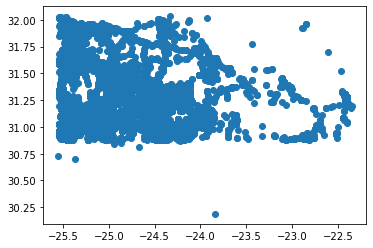

In [27]:
geo["geometry"].plot()

## Problem 3: How long have individuals travelled?

In this problem the aim is to calculate the **distance** in meters that the individuals have travelled according to the social media posts (Euclidean distances between points). In this problem, we will need the `userid`-column and the points created in the previous problem. You will need the geopackage `Kruger_posts.gpkg` generated in Problem 2 as input file.

Our goal is to answer these questions based on the input data:
- *What was the shortest distance travelled in meters?*
- *What was the mean distance travelled in meters?*
- *What was the maximum distance travelled in meters?*

Start with importing the required modules and loading the saved data.

In [61]:
from shapely.geometry import LineString

In [29]:
data = gpd.read_file("data/Kruger_posts.gpkg")

In [39]:
data.head()

lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                            geometry  
0  POINT (-4695752.719 14973674.275)  
1  POINT (-4748939.258 15014098.837)  
2  POINT (-4672729.591 14859391.193)  
3  POINT (-4679391.656 14969037.444)  
4  POINT (-4686373.982 14973910.589)

1. **Check the CRS of the input data. If this information is missing, set it as EPSG:4326 (WGS84).**
2. **Reproject the data from WGS84-projection into *EPSG:32735*-projection which stands for UTM Zone 35S (UTM zone for South Africa), in order to transform the data into the metric system (don't create a new variable, but update the existing variable `data`)**

In [37]:
data = data.to_crs("epsg:32735")

In [38]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check the data
assert data.crs.to_epsg() == 32735

3. **Group the data by userid**

In [125]:
grouped = data.sort_values("timestamp").groupby("userid")

In [126]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

#Check the number of groups:
assert len(grouped.groups) == data["userid"].nunique(), "Number of groups should match number of unique users!"

**4. Create LineString objects for each user connecting the points from oldest to latest:**

<details>
  <summary>Hints</summary>
  
  **One possible method:**
  - Create an empty DataFrame called `movements`. 
  - Create an empty column "geometry"
  - Use a for-loop where you iterate over the grouped object. For each user's data: 
      - [sort](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) the rows by timestamp 
      - create a LineString object based on the user's points
      - Add the LineString to the geometry column of the `movements` dataframe. You can also add the `userid` in a separate column (or use the userid as index).
  - Convert `movements` into a `GeoDataFrame` (you can replace the DataFrame created in the previous steps with the GeoDataFrame). Remember to set the `geometry` column.
  - Set the CRS of the `movements` GeoDataFrame as `EPSG:32735` 

  OBS! Think about what happens if a visitor only has one entry/location?
  
</details>


In [139]:
movements = pd.DataFrame()
movements["geometry"] = None

In [159]:
movements = grouped.geometry.apply(lambda x: LineString(x.values) if len(x.values) > 1 else x.values[0])

In [160]:
movements

userid
16301       LINESTRING (-4681550.088 14943799.279, -468323...
26589                       POINT (-4792681.729 14948384.789)
29322                       POINT (-4729750.563 15040717.257)
42181                       POINT (-4764400.982 14946675.913)
45136       LINESTRING (-4770692.230 14940874.449, -477069...
                                  ...                        
99966397                    POINT (-4612489.515 14858007.342)
99986933    LINESTRING (-4638612.172 14901687.488, -463575...
99988918                    POINT (-4731181.206 14932198.635)
99990870    LINESTRING (-4788544.778 14942186.180, -478854...
99995791                    POINT (-4798919.320 14935848.605)
Name: geometry, Length: 14990, dtype: geometry

In [137]:
a = [(-24.759508333, 31.3712), (-24.749845, 31.338316667), (-24.995803333, 31.592), (-24.791483333, 31.865171667), (-24.76017, 31.33943), (-25.102336167, 31.894695), (-24.774158333, 31.380341667), (-24.985141667, 31.625661667), (-25.122811167, 31.911866667)]
movements.at[1,"geometry"] = list(a)

In [150]:
for i in grouped:
    
    row = 0
    tmp = list(zip(i[1]["lat"], i[1]["lon"]))
    userid = i[1]["userid"].iloc[0]
    
    if len(tmp) < 1:
        print("shit < 1 lol")
    elif len(tmp) == 1:
        movements.at[row,"userid"] = userid
        movements.at[row,"geometry"] = list(tmp)
        row +=1
    elif len(tmp) > 1:
        movements.at[row,"geometry"] = list(tmp)
        movements.at[row,"userid"] = userid
        row += 1


In [151]:
movements

geometry      userid
0  [(-25.479763129, 30.894174496)]  99995791.0
1                              NaN         NaN
2                              NaN         NaN

In [83]:
for i in grouped:
    print(i[1]["userid"],i[1]["timestamp"])

30512    16301
30535    16301
30545    16301
30770    16301
38232    16301
38235    16301
38909    16301
38911    16301
38913    16301
Name: userid, dtype: int64 30512    2015-06-08 04:34
30535    2015-02-08 06:18
30545    2015-09-08 06:58
30770    2015-02-09 08:09
38232    2015-05-13 10:51
38235    2015-03-13 10:59
38909    2015-08-16 14:27
38911    2015-09-16 14:30
38913    2015-11-16 14:31
Name: timestamp, dtype: object
61781    26589
Name: userid, dtype: int64 61781    2015-02-25 01:54
Name: timestamp, dtype: object
78280    29322
Name: userid, dtype: int64 78280    2015-02-28 10:25
Name: timestamp, dtype: object
8081    42181
Name: userid, dtype: int64 8081    2015-08-08 13:18
Name: timestamp, dtype: object
80613    45136
81278    45136
Name: userid, dtype: int64 80613    2015-11-03 07:36
81278    2015-04-04 15:46
Name: timestamp, dtype: object
71512    48971
Name: userid, dtype: int64 71512    2015-06-07 17:18
Name: timestamp, dtype: object
42402    50136
42439    50136
42453    

KeyboardInterrupt: 

In [71]:
for i in grouped:
    print(i)
    break

(16301,              lat        lon         timestamp  userid  \
30512 -24.760170  31.339430  2015-06-08 04:34   16301   
30535 -24.759508  31.371200  2015-02-08 06:18   16301   
30545 -24.774158  31.380342  2015-09-08 06:58   16301   
30770 -24.749845  31.338317  2015-02-09 08:09   16301   
38232 -24.791483  31.865172  2015-05-13 10:51   16301   
38235 -24.995803  31.592000  2015-03-13 10:59   16301   
38909 -25.102336  31.894695  2015-08-16 14:27   16301   
38911 -24.985142  31.625662  2015-09-16 14:30   16301   
38913 -25.122811  31.911867  2015-11-16 14:31   16301   

                                geometry  
30512  POINT (-4684246.015 14939886.378)  
30535  POINT (-4681550.088 14943799.279)  
30545  POINT (-4682360.424 14945977.388)  
30770  POINT (-4683233.102 14939015.568)  
38232  POINT (-4643987.777 15007357.316)  
38235  POINT (-4688386.821 14988087.394)  
38909  POINT (-4674277.458 15033193.770)  
38911  POINT (-4684442.069 14991502.196)  
38913  POINT (-4674988.223 1503678

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

In [ ]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

assert movements.crs.to_epsg() == 32735
assert len(movements) == len(data.userid.unique())
#Check the result
print(type(movements))
print(movements.crs)
print(movements['geometry'].head())

5. **Finally, calculate the lenghts of the lines into a new column called `distance` in the `movements` GeoDataFrame.**

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

In [ ]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

# Check the output - the summed distance should be around 96700
print(f"The visitors in total travelled {movements.dist.sum() / 10000:.0f} km")

**You should now be able to answer the following questions:**

- *What was the shortest distance travelled?*
- *What was the mean distance travelled?*
- *What was the maximum distance travelled?*

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

**Last step is to save the data of into a geopackage called `some_movements.gpkg`**

In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

In [ ]:
# NON-EDIT CODE CELL FOR TESTING YOUR SOLUTION

import os

#Check if output file exists
assert os.path.isfile(fp), "Output file does not exits."